<a href="https://colab.research.google.com/github/alissatsay/TobaccoInsights/blob/main/Alissa_Tsay_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC-233: Data Analytics
## Alissa Tsay


## Final Project

In this assignment I will be evaluating the trends for tobacco consumption in the US in the past two decades among youth and adults.

In [ ]:
# Import Cell

import csv
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # - plotting library
sns.set() # the styling library
import matplotlib.style as style
style.use('fivethirtyeight')

In [ ]:
# Data on the overall consumption of different types of tobaco in the US over the years
from google.colab import drive
drive.mount('/content/drive')

file1 = '/content/drive/My Drive/Colab Notebooks/CSC233/StudentWork/Final/AT_Final Project/Adult_Tobacco_Consumption_In_The_U.S.__2000-Present.csv'

Mounted at /content/drive


This Dataset shows the oberall consumption of tobacco in the US of both Domestic Production and Imported, from 2000 to 2022.

In [ ]:
data_cons = pd.read_csv(file1)
data_cons.head()

,Year,LocationAbbrev,LocationDesc,Population,Topic,Measure,Submeasure,Data Value Unit,Domestic,Imports,Total,Domestic Per Capita,Imports Per Capita,Total Per Capita
0,2000,US,National,209786736,Noncombustible Tobacco,Smokeless Tobacco,Chewing Tobacco,Pounds,45502156,91965,45594121,0.217,0.0,0.217
1,2000,US,National,209786736,Combustible Tobacco,Cigarettes,Cigarette Removals,Cigarettes,423250355675,12319663000,435570018675,2018.000,59.0,2076.000
2,2000,US,National,209786736,Combustible Tobacco,Cigars,Total Cigars,Cigars,5612867329,548243000,6161110329,27.000,3.0,29.000
3,2000,US,National,209786736,Combustible Tobacco,Loose Tobacco,Total Loose Tobacco,Cigarette Equivalents,8291276800,702741662,8994018462,40.000,3.0,43.000
4,2000,US,National,209786736,Combustible Tobacco,Loose Tobacco,Total Loose Tobacco,Pounds,16841656,1427444,18269100,0.000,0.0,0.000


The 'Topic' column represents whether or not the tobacco product requires burning to be consumed. Combustible products are those that require burning of the product for consumption - cigars, cigarettes, and cigarills. Non-combustible products do not require burning for consumption - smokeless tobacco.

Domestic and Imports columns indicate how much of the consumed tobacco is domestically produced, and how much is imported from abroad. Per Capita is the amount of consumed tobacco per person.

In [ ]:
r,c = data_cons.shape
print('There are {} rows and {} columns in my Adult_Tobacco_Consumption_In_The_U.S.__2000-Present.csv dataset'.format(r,c))

There are 299 rows and 14 columns in my Adult_Tobacco_Consumption_In_The_U.S.__2000-Present.csv dataset


In [ ]:
# looking at the missing values
data_cons.isna().any()

Year                   False
LocationAbbrev         False
LocationDesc           False
Population             False
Topic                  False
Measure                False
Submeasure             False
Data Value Unit        False
Domestic               False
Imports                False
Total                  False
Domestic Per Capita    False
Imports Per Capita     False
Total Per Capita       False
dtype: bool

As can be seen, our imports dataset is complete.

In [ ]:
# looking at the datatypes in the dataset
print('The datatype of each column in the data:\n')
data_cons.dtypes

The datatype of each column in the data:



Year                     int64
LocationAbbrev          object
LocationDesc            object
Population               int64
Topic                   object
Measure                 object
Submeasure              object
Data Value Unit         object
Domestic                 int64
Imports                  int64
Total                    int64
Domestic Per Capita    float64
Imports Per Capita     float64
Total Per Capita       float64
dtype: object

In [ ]:
print('The column headings of the data are:\n')
data_cons.columns

The column headings of the data are:



Index(['Year', 'LocationAbbrev', 'LocationDesc', 'Population', 'Topic',
       'Measure', 'Submeasure', 'Data Value Unit', 'Domestic', 'Imports',
       'Total', 'Domestic Per Capita', 'Imports Per Capita',
       'Total Per Capita'],
      dtype='object')

Now let's take a look at some of the columns. I suspect that LocationDesc and LocationAbbrev are going to have the same values for each row. Since it is assumed that all data is for US only.

In [ ]:
data_cons.value_counts('LocationDesc')

LocationDesc
National    299
dtype: int64

In [ ]:
data_cons.value_counts('LocationAbbrev')

LocationAbbrev
US    299
dtype: int64

As suspected, LocationDesc and LocationAbbrev do have the same values for each row, therefore we can delete them.

In [ ]:
data_cons = data_cons.drop(['LocationDesc','LocationAbbrev'], axis = 'columns')

In [ ]:
r,c = data_cons.shape
print('There are now {} rows and {} columns in my Adult_Tobacco_Consumption_In_The_U.S.__2000-Present.csv dataset'.format(r,c))

There are now 299 rows and 12 columns in my Adult_Tobacco_Consumption_In_The_U.S.__2000-Present.csv dataset


Let's look at the year-range of the imports data.

In [ ]:
data_cons.value_counts('Year')

Year
2000    13
2012    13
2021    13
2020    13
2019    13
2018    13
2017    13
2016    13
2015    13
2014    13
2013    13
2011    13
2001    13
2010    13
2009    13
2008    13
2007    13
2006    13
2005    13
2004    13
2003    13
2002    13
2022    13
dtype: int64

This dataset contains an even number of entrees for each year 2000-2022.

In [ ]:
# Data on the tobacco use by youth 1999 - 2017 in each state
from google.colab import drive
drive.mount('/content/drive')

file2 = '/content/drive/My Drive/Colab Notebooks/CSC233/StudentWork/Final/AT_Final Project/Youth_Tobacco_Survey__YTS__Data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This Dataset shows the results of the surveys provided by YTS for Tobacco Consumption among youth in different states 1999 - 2017. The YTS was developed to provide states with comprehensive data on both middle school and high school students regarding tobacco use, exposure to environmental tobacco smoke, smoking cessation, school curriculum, minors' ability to purchase or otherwise obtain tobacco products, knowledge and attitudes about tobacco, and familiarity with pro-tobacco and anti-tobacco media messages. Tobacco topics included are cigarette smoking prevalence, cigarette smoking frequency, smokeless tobacco products prevalence and quit attempts.

In [ ]:
data_youth = pd.read_csv(file2)
data_youth.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11


In [ ]:
r,c = data_youth.shape
print('There are {} rows and {} columns in my Youth_Tobacco_Survey__YTS__Data.csv dataset'.format(r,c))

There are 10600 rows and 31 columns in my Youth_Tobacco_Survey__YTS__Data.csv dataset


In [ ]:
# looking at the missing values
data_youth.isna().any()

YEAR                          False
LocationAbbr                  False
LocationDesc                  False
TopicType                     False
TopicDesc                     False
MeasureDesc                   False
DataSource                    False
Response                       True
Data_Value_Unit               False
Data_Value_Type               False
Data_Value                     True
Data_Value_Footnote_Symbol     True
Data_Value_Footnote            True
Data_Value_Std_Err             True
Low_Confidence_Limit           True
High_Confidence_Limit          True
Sample_Size                    True
Gender                        False
Race                          False
Age                           False
Education                     False
GeoLocation                    True
TopicTypeId                   False
TopicId                       False
MeasureId                     False
StratificationID1             False
StratificationID2             False
StratificationID3           

In [ ]:
data_youth.isna().sum()

YEAR                              0
LocationAbbr                      0
LocationDesc                      0
TopicType                         0
TopicDesc                         0
MeasureDesc                       0
DataSource                        0
Response                       2410
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                      520
Data_Value_Footnote_Symbol    10083
Data_Value_Footnote           10083
Data_Value_Std_Err              520
Low_Confidence_Limit            517
High_Confidence_Limit           520
Sample_Size                     520
Gender                            0
Race                              0
Age                               0
Education                         0
GeoLocation                       4
TopicTypeId                       0
TopicId                           0
MeasureId                         0
StratificationID1                 0
StratificationID2                 0
StratificationID3           

Some of the rows are missing data, namely the Data_Value column and all value characteristic related columns.

In [ ]:
print('The datatype of each column in the data:\n')
data_youth.dtypes

The datatype of each column in the data:



YEAR                            int64
LocationAbbr                   object
LocationDesc                   object
TopicType                      object
TopicDesc                      object
MeasureDesc                    object
DataSource                     object
Response                       object
Data_Value_Unit                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Data_Value_Std_Err            float64
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
Gender                         object
Race                           object
Age                            object
Education                      object
GeoLocation                    object
TopicTypeId                    object
TopicId                        object
MeasureId                      object
StratificationID1              object
Stratificati

In [ ]:
print('The column headings of the data are:\n')
data_youth.columns

The column headings of the data are:



Index(['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc',
       'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'Gender', 'Race', 'Age',
       'Education', 'GeoLocation', 'TopicTypeId', 'TopicId', 'MeasureId',
       'StratificationID1', 'StratificationID2', 'StratificationID3',
       'StratificationID4', 'SubMeasureID', 'DisplayOrder'],
      dtype='object')

Getting rid of the columns in the data irrelevant for the trend I want to analyze:

In [ ]:
data_youth.value_counts('TopicType')

TopicType
Tobacco Use – Survey Data    10600
dtype: int64

The topic is consistent among all entrees - therefore it can be dropped.

In [ ]:
data_youth.value_counts('DataSource')

DataSource
YTS     10566
NYTS       34
dtype: int64

The DataSource is irrelevant for my analysis.

In [ ]:
data_youth.value_counts('Data_Value_Unit')

Data_Value_Unit
%    10600
dtype: int64

In [ ]:
data_youth.value_counts('Data_Value_Type')

Data_Value_Type
Percentage    10600
dtype: int64

Since all data is in the same unit - percentages, this column is also unnecessary.

In [ ]:
data_youth.value_counts('GeoLocation')

GeoLocation
(32.745510099, -89.538030825)       651
(32.840571122, -86.631860762)       426
(40.130570048, -74.273691288)       411
(44.393191174, -89.816370742)       408
(41.56266102, -72.649840952)        405
(35.466220975, -79.159250463)       402
(47.475319779, -100.118421049)      378
(38.665510202, -80.712640135)       378
(39.008830667, -75.577741168)       354
(33.998821303, -81.045371207)       348
(35.472031356, -97.521070214)       342
(40.793730152, -77.860700294)       330
(38.635790776, -92.566300053)       318
(21.304850435, -157.857749403)      312
(32.839681093, -83.627580346)       303
(40.060210141, -82.404260056)       303
(31.312660644, -92.445680071)       288
(39.766910452, -86.149960194)       288
(40.485010283, -88.997710178)       282
(42.469400913, -93.816490556)       276
(34.86597028, -111.763811277)       264
(41.641040988001, -99.365720623)    258
(37.645970271, -84.774971048)       255
(44.353130053, -100.373530637)      234
(34.748650124, -92.274490743

Exact GeoLocation is irrelevant for my analysis, there is already a state column - knowing the state is enough for my study.

In [ ]:
data_youth.value_counts('TopicTypeId')

TopicTypeId
BEH    10600
dtype: int64

In [ ]:
data_youth.value_counts('TopicId')

TopicId
106BEH    4107
151BEH    4083
105BEH    2410
dtype: int64

In [ ]:
data_youth.value_counts('MeasureId')

MeasureId
166SSA    4107
169USS    4083
170CES    1284
169QUA    1126
dtype: int64

Topic Type ID, Topic ID, and Measure ID are all documented factors also irrelevant for the study.

In [ ]:
data_youth.value_counts('StratificationID1')

StratificationID1
1GEN    3556
2GEN    3522
3GEN    3522
dtype: int64

In [ ]:
data_youth.value_counts('StratificationID2')

StratificationID2
8AGE    10600
dtype: int64

In [ ]:
data_youth.value_counts('StratificationID3')

StratificationID3
6RAC    10600
dtype: int64

In [ ]:
data_youth.value_counts('StratificationID4')

StratificationID4
1EDU    5633
2EDU    4967
dtype: int64

Stratification IDs are details about the respondent, such as age, generation, education, etc. which I do not need for now.

In [ ]:
 data_youth = data_youth.drop(['TopicType', 'DataSource', 'Data_Value_Unit', 'Data_Value_Type', 'GeoLocation', 'TopicTypeId', 'TopicId', 'MeasureId', 'StratificationID1', 'StratificationID2', 'StratificationID3', 'StratificationID4', 'SubMeasureID','Data_Value_Footnote_Symbol','Data_Value_Footnote','DisplayOrder'], axis = 'columns')
 data_youth.head()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education
0,2004,OH,Ohio,Cigarette Use (Youth),Smoking Status,Ever,32.2,3.2,25.8,38.5,1377.0,Overall,All Races,All Ages,Middle School
1,2008,AL,Alabama,Cigarette Use (Youth),Smoking Status,Ever,47.8,2.9,42.1,53.5,654.0,Female,All Races,All Ages,High School
2,2015,WV,West Virginia,Smokeless Tobacco Use (Youth),User Status,Frequent,12.7,1.9,9.0,16.4,781.0,Male,All Races,All Ages,High School
3,2005,IL,Illinois,Cigarette Use (Youth),Smoking Status,Ever,28.5,2.2,24.2,32.8,1323.0,Overall,All Races,All Ages,Middle School
4,2005,CT,Connecticut,Smokeless Tobacco Use (Youth),User Status,Ever,20.5,2.3,16.0,25.1,973.0,Male,All Races,All Ages,High School


In [ ]:
data_youth.value_counts('TopicDesc')

TopicDesc
Cigarette Use (Youth)            4107
Smokeless Tobacco Use (Youth)    4083
Cessation (Youth)                2410
dtype: int64

The cessation row stands for the number of quit attempt among youth. If not removed, these rows could significantly impact our analysis.

In [ ]:
data_youth = data_youth.drop(data_youth[data_youth['TopicDesc'] == 'Cessation (Youth)'].index)

In [ ]:
# making sure that I dropped only what I needed to
data_youth.value_counts('TopicDesc')

TopicDesc
Cigarette Use (Youth)            4107
Smokeless Tobacco Use (Youth)    4083
dtype: int64

In [ ]:
# Importing Data on the tobacco use by adults 1999 - 2017 in each state
from google.colab import drive
drive.mount('/content/drive')

file3 = '/content/drive/My Drive/Colab Notebooks/CSC233/StudentWork/Final/AT_Final Project/Tobacco_Use_Supplement_to_the_Current_Population_Survey__TUS-CPS__Data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This DataSet shows the results of the sutveys conducted by TUS-CPS on the tobacco consumption among adults, 1992-1993, 1995-1996, 1998-1999, 2001-2002, 2003, 2006-2007, 2010-2011, 2014-2015.

Tobacco topics included are cigarette smoking status, cigarette smoking prevalence by demographics, cigarette smoking frequency, cigarette consumption, quit attempts, cigar use, pipe use, smokeless tobacco use, and smokefree rules/policies in homes and worksites.

In [ ]:
data_adults = pd.read_csv(file3)
data_adults.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2003,RI,Rhode Island,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,TUS-CPS,NaN,%,Percentage,...,"(41.708280193, -71.522470314)",BEH,100BEH,111CSA,1GEN,7AGE,6RAC,3EDU,TUS24,24
1,1995-1996,UT,Utah,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,TUS-CPS,NaN,%,Percentage,...,"(39.360700171, -111.587130635)",BEH,100BEH,111CSA,1GEN,6AGE,6RAC,5EDU,TUS24,24
2,2014-2015,US,National (States and DC),Smokefree Rules/Policies – Survey Data,Smokefree Rules in Homes (Adults),Smokefree Rules in Homes,TUS-CPS,NaN,%,Percentage,...,NaN,ENV,351ENV,152SRL,1GEN,8AGE,6RAC,6EDU,TUS04,4
3,1998-1999,DC,District of Columbia,Tobacco Use – Survey Data,Cigar Use (Adults),Smoking Status,TUS-CPS,Former,%,Percentage,...,"(38.890371385, -77.031961127)",BEH,103BEH,170SSA,2GEN,8AGE,6RAC,6EDU,TUS12,12
4,2001-2002,US,National (States and DC),Smokefree Rules/Policies – Survey Data,Smokefree Policies in Indoor Worksites (Adults),Smokefree Policies in Indoor Worksites,TUS-CPS,NaN,%,Percentage,...,"(37.09024, -95.712891)",ENV,350ENV,151SPL,1GEN,8AGE,6RAC,6EDU,TUS01,1


In [ ]:
r,c = data_adults.shape
print('There are {} rows and {} columns in my Tobacco_Use_Supplement_to_the_Current_Population_Survey__TUS-CPS__Data.csv dataset'.format(r,c))

There are 32792 rows and 31 columns in my Tobacco_Use_Supplement_to_the_Current_Population_Survey__TUS-CPS__Data.csv dataset


In [ ]:
# looking at the datatypes
print('The data type of each column in the data:\n')

data_adults.dtypes

The data type of each column in the data:



YEAR                           object
LocationAbbr                   object
LocationDesc                   object
TopicType                      object
TopicDesc                      object
MeasureDesc                    object
DataSource                     object
Response                       object
Data_Value_Unit                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Data_Value_Std_Err            float64
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
Gender                         object
Race                           object
Age                            object
Education                      object
GeoLocation                    object
TopicTypeId                    object
TopicId                        object
MeasureId                      object
StratificationID1              object
Stratificati

In [ ]:
# looking at the missing values
data_adults.isna().any()

YEAR                          False
LocationAbbr                  False
LocationDesc                  False
TopicType                     False
TopicDesc                     False
MeasureDesc                   False
DataSource                    False
Response                       True
Data_Value_Unit                True
Data_Value_Type               False
Data_Value                     True
Data_Value_Footnote_Symbol     True
Data_Value_Footnote            True
Data_Value_Std_Err             True
Low_Confidence_Limit           True
High_Confidence_Limit          True
Sample_Size                    True
Gender                        False
Race                          False
Age                           False
Education                     False
GeoLocation                    True
TopicTypeId                   False
TopicId                       False
MeasureId                     False
StratificationID1             False
StratificationID2             False
StratificationID3           

Some of columns aremissing data - let's see how much data is missing in every column.

In [ ]:
data_adults.isna().sum()

YEAR                              0
LocationAbbr                      0
LocationDesc                      0
TopicType                         0
TopicDesc                         0
MeasureDesc                       0
DataSource                        0
Response                      12596
Data_Value_Unit                1071
Data_Value_Type                   0
Data_Value                     1050
Data_Value_Footnote_Symbol    31739
Data_Value_Footnote           31738
Data_Value_Std_Err             1059
Low_Confidence_Limit           1059
High_Confidence_Limit          1059
Sample_Size                    1053
Gender                            0
Race                              0
Age                               0
Education                         0
GeoLocation                       4
TopicTypeId                       0
TopicId                           0
MeasureId                         0
StratificationID1                 0
StratificationID2                 0
StratificationID3           

Some data is missing from the dataset, 1050 entrees of 32792 - not too bad, less than 1/30th.

Let's take a look at value types in our adults data:

In [ ]:
data_adults.value_counts('Data_Value_Type')

Data_Value_Type
Percentage    31721
Mean           1071
dtype: int64

In [ ]:
data_adults.value_counts('Data_Value_Unit')

Data_Value_Unit
%    31721
dtype: int64

Most of the data is in percentages, however, some of the data is in mean values. Let's take a closer look at it:

In [ ]:
mask_means = data_adults['Data_Value_Type'] == 'Mean'
adults_means = data_adults[mask_means]
adults_means.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
6,2006-2007,OR,Oregon,Tobacco Use – Survey Data,Cigarette Consumption (Adults),Daily Cigarette Consumption Among Every Day Sm...,TUS-CPS,NaN,NaN,Mean,...,"(44.567449424, -120.155031326)",BEH,102BEH,131DCA,2GEN,8AGE,6RAC,6EDU,TUS15,15
7,2010-2011,WV,West Virginia,Tobacco Use – Survey Data,Cigarette Consumption (Adults),Daily Cigarette Consumption Among Every Day Sm...,TUS-CPS,NaN,NaN,Mean,...,"(38.665510202, -80.712640135)",BEH,102BEH,131DCA,3GEN,8AGE,6RAC,6EDU,TUS16,16
62,1995-1996,WA,Washington,Tobacco Use – Survey Data,Cigarette Consumption (Adults),Daily Cigarette Consumption Among Every Day Sm...,TUS-CPS,NaN,NaN,Mean,...,"(47.522278629, -120.47001079)",BEH,102BEH,131DCA,3GEN,8AGE,6RAC,6EDU,TUS16,16
101,1992-1993,WY,Wyoming,Tobacco Use – Survey Data,Cigarette Consumption (Adults),Daily Cigarette Consumption Among Every Day Sm...,TUS-CPS,NaN,NaN,Mean,...,"(43.235541343, -108.109830353)",BEH,102BEH,131DCA,1GEN,8AGE,6RAC,6EDU,TUS14,14
113,1992-1993,LA,Louisiana,Tobacco Use – Survey Data,Cigarette Consumption (Adults),Daily Cigarette Consumption Among Every Day Sm...,TUS-CPS,NaN,NaN,Mean,...,"(31.312660644, -92.445680071)",BEH,102BEH,131DCA,3GEN,8AGE,6RAC,6EDU,TUS16,16


Since it is unclear which mean value the dataset refers to, in addition to the fact that it is only a small percenatge of the data, it is better to drop it to avoid any unexpected results.

In [ ]:
data_adults = data_adults.drop(data_adults[data_adults['Data_Value_Type'] == 'Mean'].index)

In [ ]:
# Cleaning the adults dataset - deleting everything that is irrelevant for our analysis

In [ ]:
data_adults.columns

Index(['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc',
       'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'Gender', 'Race', 'Age',
       'Education', 'GeoLocation', 'TopicTypeId', 'TopicId', 'MeasureId',
       'StratificationID1', 'StratificationID2', 'StratificationID3',
       'StratificationID4', 'SubMeasureID', 'DisplayOrder'],
      dtype='object')

In [ ]:
data_adults = data_adults.drop(['Data_Value_Unit', 'Data_Value_Type', 'TopicType', 'DataSource', 'GeoLocation', 'TopicTypeId', 'TopicId', 'MeasureId', 'StratificationID1', 'StratificationID2', 'StratificationID3', 'StratificationID4', 'SubMeasureID', 'DisplayOrder','Data_Value_Footnote_Symbol','Data_Value_Footnote'], axis = 'columns')
data_adults.head()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education
0,2003,RI,Rhode Island,Cigarette Use (Adults),Current Smoking,NaN,21.1,1.8,17.6,24.6,693.0,Overall,All Races,Age 25 and Older,<12th Grade
1,1995-1996,UT,Utah,Cigarette Use (Adults),Current Smoking,NaN,9.3,0.8,7.8,10.7,1830.0,Overall,All Races,Age 20 and Older,>12th Grade
2,2014-2015,US,National (States and DC),Smokefree Rules in Homes (Adults),Smokefree Rules in Homes,NaN,85.8,0.1,85.5,86.0,121865.0,Overall,All Races,All Ages,All Grades
3,1998-1999,DC,District of Columbia,Cigar Use (Adults),Smoking Status,Former,4.7,0.7,3.5,6.0,908.0,Male,All Races,All Ages,All Grades
4,2001-2002,US,National (States and DC),Smokefree Policies in Indoor Worksites (Adults),Smokefree Policies in Indoor Worksites,NaN,70.8,0.2,70.4,71.1,85135.0,Overall,All Races,All Ages,All Grades


Additionally, the dataset contains the rows in'TopicDesc' which represent the data on Smokefree policies indoors. These numbers represent the persentage of homes and facilities with implemented smokefree policies, but, since their Data_Value is in the same column as our smoking percentages, these rows will significantly impact the mean values we will get from the data if we took the mean. Therefore, I'll remove those rows.

In [ ]:
data_adults.value_counts('TopicDesc')

TopicDesc
Cigarette Use (Adults)                             13527
Cigar Use (Adults)                                  3667
Pipe Use (Adults)                                   3647
Smokeless Tobacco Use (Adults)                      3627
Cigarette Consumption (Adults)                      3213
Cessation (Adults)                                  2405
Smokefree Policies in Indoor Worksites (Adults)     1222
Smokefree Rules in Homes (Adults)                    413
dtype: int64

In [ ]:
data_adults = data_adults.drop(data_adults[data_adults['TopicDesc'] == 'Smokefree Policies in Indoor Worksites (Adults)'].index)

In [ ]:
data_adults = data_adults.drop(data_adults[data_adults['TopicDesc'] == 'Smokefree Rules in Homes (Adults)'].index)

The Cessation rows represent the quit attempts - those are also values which will significantly impact our analysis if not removed. Let's drop it.

In [ ]:
data_adults = data_adults.drop(data_adults[data_adults['TopicDesc'] == 'Cessation (Adults)'].index)

Additionally, we can see that there are 'Cigartte Use' and 'Cigarette consumption' categories - which are essentially the same category, just named differently. Next, I will rename 'Cigarette consumption' with 'Cogartte Use' to combine the two.

In [ ]:
data_adults = data_adults.replace('Cigarette Consumption (Adults)', 'Cigarette Use (Adults)')

In [ ]:
# checking if renaming went as planned
data_adults.value_counts('TopicDesc')

TopicDesc
Cigarette Use (Adults)            16740
Cigar Use (Adults)                 3667
Pipe Use (Adults)                  3647
Smokeless Tobacco Use (Adults)     3627
dtype: int64

In [ ]:
# Checking if I dropped everything correctly
data_adults.value_counts('TopicDesc')

TopicDesc
Cigarette Use (Adults)            16740
Cigar Use (Adults)                 3667
Pipe Use (Adults)                  3647
Smokeless Tobacco Use (Adults)     3627
dtype: int64

Taking a look at what values we have in 'Races' and 'Gender' column in both youth and adults datasets - to see whether or not the numbers are highr enough to be relevant

In [ ]:
print('The Race data in my data_adults dataset:\n')
data_adults.value_counts('Race')


The Race data in my data_adults dataset:



Race
All Races                        25861
White                              408
African American                   374
Hispanic                           371
Asian/Pacific Islander             352
American Indian/Alaska Native      315
dtype: int64

In [ ]:
print('The Race data in my data_youth dataset:\n')
data_youth.value_counts('Race')

The Race data in my data_youth dataset:



Race
All Races    8190
dtype: int64

In [ ]:
print('The Gender data in my data_adults dataset:\n')
data_adults.value_counts('Gender')

The Gender data in my data_adults dataset:



Gender
Overall    13040
Female      7484
Male        7157
dtype: int64

In [ ]:
print('The Gender data in my data_youth dataset:\n')
data_youth.value_counts('Gender')

The Gender data in my data_youth dataset:



Gender
Female     2730
Male       2730
Overall    2730
dtype: int64

In [ ]:
print('The Age data in my data_youth dataset:\n')
data_youth.value_counts('Age')

The Age data in my data_youth dataset:



Age
All Ages    8190
dtype: int64

As can be seen, the data_youth dataset only contains data for all races and all ages - hence, the 'Race' and 'Age columns can be dropped

In [ ]:
data_youth = data_youth.drop('Race', axis = 'columns')

In [ ]:
data_youth = data_youth.drop('Age', axis = 'columns')

Let's check how many instances we have for each year for both youth and adults datasets:

In [ ]:
data_youth.value_counts('YEAR')

YEAR
2000    918
2002    774
2009    540
2013    522
2005    486
2004    468
2017    444
2015    432
2011    414
2007    402
2006    396
2008    390
2003    378
2010    360
2001    324
1999    294
2014    252
2012    198
2016    198
dtype: int64

In [ ]:
data_adults.value_counts('YEAR')

YEAR
2001-2002       3570
2010-2011       3570
2014-2015       3570
1992-1993       3557
1995-1996       3557
1998-1999       3521
2003            2940
2006-2007       2784
2006-2007        612
dtype: int64

In [ ]:
print('The mean values for each year in the data_adults dataset:\n')
data_adults.groupby(by='YEAR')['Data_Value'].mean()

The mean values for each year in the data_adults dataset:



YEAR
1992-1993       32.811462
1995-1996       32.589763
1998-1999       32.531292
2001-2002       31.823459
2003            30.997516
2006-2007       29.744935
2006-2007       31.407651
2010-2011       30.463890
2014-2015       30.057927
Name: Data_Value, dtype: float64

As can be seen, the amounts of data significantly differ in some years for the Youth dataset, which could make data for some years biased - impacting our analysis.

In the Adults dataset, some of the years are not represented at all. Additionally, 2006-2007 is shown twice. I will try to understand why it happens.

In [ ]:
data_adults.head()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education
0,2003,RI,Rhode Island,Cigarette Use (Adults),Current Smoking,NaN,21.1,1.8,17.6,24.6,693.0,Overall,All Races,Age 25 and Older,<12th Grade
1,1995-1996,UT,Utah,Cigarette Use (Adults),Current Smoking,NaN,9.3,0.8,7.8,10.7,1830.0,Overall,All Races,Age 20 and Older,>12th Grade
3,1998-1999,DC,District of Columbia,Cigar Use (Adults),Smoking Status,Former,4.7,0.7,3.5,6.0,908.0,Male,All Races,All Ages,All Grades
8,2014-2015,WI,Wisconsin,Cigarette Use (Adults),Smoking Frequency,Some Days,25.1,3.2,18.9,31.3,273.0,Female,All Races,All Ages,All Grades
9,1995-1996,MD,Maryland,Cigarette Use (Adults),Smoking Status,Current,19.9,1.1,17.7,22.1,1442.0,Female,All Races,All Ages,All Grades


In [ ]:
print('The values in the Measure Description column:\n')
data_adults.value_counts('MeasureDesc')

The values in the Measure Description column:



MeasureDesc
Smoking Status                                                                11445
Current Smoking                                                                7485
Daily Cigarette Consumption Among Every Day Smokers - Frequency Categories     3213
User Status                                                                    3168
Smoking Frequency                                                              2370
dtype: int64

In [ ]:
print('The Responses to the Measure Description:\n')
data_adults.value_counts('Response')

The Responses to the Measure Description:



Response
Never                  4896
Former                 4870
Current                4847
Every Day              1185
Some Days              1185
15 to 25 Cigarettes    1071
<15 Cigarettes         1071
>25 Cigarettes         1071
dtype: int64

The measure Description column represents the description of the smoking status of the respondent, the Response column - the smoking status. However, as we can see, the format of the response recording differ significantly which might be the reason why the years 2006-2007 were represented twice.

To bring these two columns to a single format, I will consider all Former smokers and those who never smoked - non-smokers, and all others - current smokers, regardless of the number of cigarettes cunsumed.

Now, we need to drop all who responded 'Never' and 'Former'

In [ ]:
data_adults = data_adults.drop(data_adults[data_adults['Response'] == 'Never'].index)

In [ ]:
data_adults = data_adults.drop(data_adults[data_adults['Response'] == 'Former'].index)

In [ ]:
# cheking if the data was dropped correctly

print('The Responses to the Measure Description:\n')
data_adults.value_counts('Response')

The Responses to the Measure Description:



Response
Current                4847
Every Day              1185
Some Days              1185
15 to 25 Cigarettes    1071
<15 Cigarettes         1071
>25 Cigarettes         1071
dtype: int64

Since all remaining respondents were identified as smokers, both columns now can be dropped to avoid the confusion in the data.

In [ ]:
data_adults = data_adults.drop(['MeasureDesc', 'Response'], axis = 'columns')

Let's now check if the value_count method counts things correctly

In [ ]:
data_adults.value_counts('YEAR')

YEAR
2001-2002       2346
2010-2011       2346
2014-2015       2346
1992-1993       2338
1995-1996       2338
1998-1999       2313
2006-2007       1866
2003            1716
2006-2007        306
dtype: int64

It did not, let's try to pull it out

In [ ]:
mask_year = data_adults['YEAR'] == '2006-2007'
adults_year = data_adults[mask_year]
adults_year.head()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education
73,2006-2007,DC,District of Columbia,Cigarette Use (Adults),17.0,1.4,14.3,19.7,1266.0,Male,All Races,All Ages,All Grades
104,2006-2007,NV,Nevada,Cigarette Use (Adults),20.8,1.3,18.2,23.4,1827.0,Male,All Races,All Ages,All Grades
125,2006-2007,WV,West Virginia,Cigarette Use (Adults),25.1,1.3,22.6,27.6,1500.0,Female,All Races,All Ages,All Grades
130,2006-2007,NJ,New Jersey,Cigarette Use (Adults),15.4,0.8,13.8,17.0,2151.0,Male,All Races,All Ages,All Grades
180,2006-2007,WY,Wyoming,Cigarette Use (Adults),23.0,1.4,20.2,25.8,1510.0,Female,All Races,All Ages,All Grades


In [ ]:
r,c = adults_year.shape
print('There are {} rows and {} columns in my data_adults for 2006-2007 dataset'.format(r,c))

There are 306 rows and 13 columns in my data_adults for 2006-2007 dataset


In [ ]:
print('The unique year names in the adults dataset:\n')
data_adults['YEAR'].unique()

The unique year names in the adults dataset:



array(['2003', '1995-1996   ', '2014-2015', '2001-2002   ',
       '1998-1999   ', '2010-2011', '1992-1993   ', '2006-2007   ',
       '2006-2007'], dtype=object)

Now the problem is obvios - there are simply different numbers of spaces in each string. Let's rename all string to make the data more consistent:

In [ ]:
data_adults = data_adults.replace('1995-1996   ', '1995-1996')
data_adults = data_adults.replace('2001-2002   ', '2001-2002')
data_adults = data_adults.replace('1998-1999   ', '1998-1999')
data_adults = data_adults.replace('1992-1993   ', '1992-1993')
data_adults = data_adults.replace('2006-2007   ', '2006-2007')

In [ ]:
# checking if the data was replaced correctly
data_adults.value_counts('YEAR')

YEAR
2001-2002    2346
2010-2011    2346
2014-2015    2346
1992-1993    2338
1995-1996    2338
1998-1999    2313
2006-2007    2172
2003         1716
dtype: int64

Now the datasets are clean and ready for analysis.
Let's check if we have information for all states.

In [ ]:
data_youth.value_counts('LocationDesc')

LocationDesc
Mississippi             522
New Jersey              324
North Carolina          324
Alabama                 324
Wisconsin               306
Connecticut             306
Delaware                288
West Virginia           288
North Dakota            288
South Carolina          270
Oklahoma                270
Missouri                252
Pennsylvania            252
Hawaii                  246
Georgia                 234
Ohio                    234
Indiana                 228
Louisiana               216
Illinois                216
Iowa                    216
Kentucky                198
Arizona                 198
Nebraska                198
South Dakota            180
Arkansas                168
Minnesota               144
New Hampshire           144
Kansas                  144
Tennessee               126
Utah                    108
Rhode Island            108
Michigan                108
Vermont                  72
California               72
New York                 72
Marylan

In [ ]:
data_adults.value_counts('LocationDesc')

LocationDesc
California              359
North Carolina          359
Texas                   357
Florida                 357
Michigan                357
New York                357
Illinois                357
Georgia                 357
Oklahoma                357
Washington              356
Virginia                356
Colorado                356
New Jersey              356
Nevada                  356
Ohio                    356
Pennsylvania            356
Arizona                 356
Minnesota               356
Missouri                356
Connecticut             355
Oregon                  355
Indiana                 355
Tennessee               355
Maryland                355
Massachusetts           355
Kansas                  354
Wisconsin               354
New Mexico              354
Mississippi             353
Louisiana               353
South Carolina          353
Arkansas                353
Alabama                 352
Kentucky                352
Iowa                    351
Utah   

The data for adults is more-less consistent across the states, however, the amount of data for the youth significantly differers for some states. Some states, like Missisipi have 651 entrees, while others, like Wyoming - only 24. Therefore, this could significantly impact the significance of the analysis we perform on this data.

Now let's take a closer look at the dataset for tobacco consumption for youth. To remove some of the biaseness as much as possible, let's take a look at the mean values of overall tobacco consumption over the years:

In [ ]:
print('The mean values for each year in the data:\n')
data_youth.groupby(by='YEAR')['Data_Value'].mean()

The mean values for each year in the data:



YEAR
1999    18.721088
2000    17.279303
2001    13.885802
2002    16.008527
2003    12.478307
2004    13.103419
2005    13.778189
2006    13.767172
2007    12.941045
2008    12.100256
2009    11.621481
2010    12.245556
2011    11.785266
2012    10.676768
2013     8.981418
2014     8.088492
2015     7.867593
2016     6.646667
2017     7.189414
Name: Data_Value, dtype: float64

Creating a plot to illustrate the trend:

In [ ]:
means = data_youth.groupby(by='YEAR')['Data_Value'].mean()

In [ ]:
years = data_youth['YEAR'].unique()
years.sort()
years

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [ ]:
df = pd.DataFrame({'Total_mean':means}, index = years)

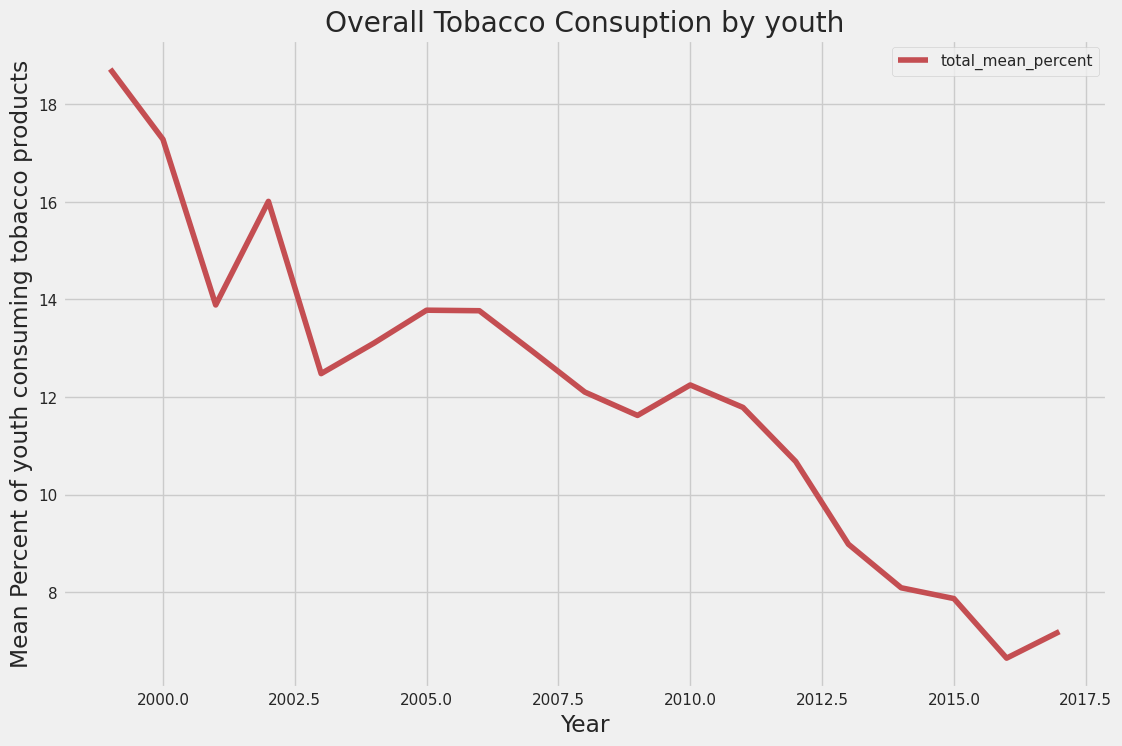

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df.index,df['Total_mean'], color='r',linestyle='-',label='total_mean_percent') # setting the color, line style, labels
#plt.plot(df.index,df['cos'], 'r-',label='cos') # a shortcut syntax to setting something very conventional - like a blue solid line

plt.legend() #put the window with the labels of the lines
plt.title('Overall Tobacco Consuption by youth')
plt.xlabel("Year") # AXIS and TITLE
plt.ylabel("Mean Percent of youth consuming tobacco products")
plt.show()

As can be seen from Data_Value column and from the graph, the mean persent of adolescents consuming tobacco have been steadily decreasing from 1999 to 2017, having decreased from 18.7 to 7.2 percent. Let's now take a look at the trends for adults:

In [ ]:
data_youth.head()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Education
0,2004,OH,Ohio,Cigarette Use (Youth),Smoking Status,Ever,32.2,3.2,25.8,38.5,1377.0,Overall,Middle School
1,2008,AL,Alabama,Cigarette Use (Youth),Smoking Status,Ever,47.8,2.9,42.1,53.5,654.0,Female,High School
2,2015,WV,West Virginia,Smokeless Tobacco Use (Youth),User Status,Frequent,12.7,1.9,9.0,16.4,781.0,Male,High School
3,2005,IL,Illinois,Cigarette Use (Youth),Smoking Status,Ever,28.5,2.2,24.2,32.8,1323.0,Overall,Middle School
4,2005,CT,Connecticut,Smokeless Tobacco Use (Youth),User Status,Ever,20.5,2.3,16.0,25.1,973.0,Male,High School


Let's now create two new datasets from the data_youth - one for cigarette use only, one for smokeless tobacco use only.

In [ ]:
data_youth.value_counts('TopicDesc')

TopicDesc
Cigarette Use (Youth)            4107
Smokeless Tobacco Use (Youth)    4083
dtype: int64

In [ ]:
mask_smokeless = data_youth['TopicDesc'] == 'Smokeless Tobacco Use (Youth)'
youth_smokeless = data_youth[mask_smokeless]
mask_cigarette = data_youth['TopicDesc'] == 'Cigarette Use (Youth)'
youth_cigarette = data_youth[mask_cigarette]

In [ ]:
youth_smokeless.head()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Education
2,2015,WV,West Virginia,Smokeless Tobacco Use (Youth),User Status,Frequent,12.7,1.9,9.0,16.4,781.0,Male,High School
4,2005,CT,Connecticut,Smokeless Tobacco Use (Youth),User Status,Ever,20.5,2.3,16.0,25.1,973.0,Male,High School
5,2009,CT,Connecticut,Smokeless Tobacco Use (Youth),User Status,Frequent,1.2,0.3,0.6,1.8,2214.0,Overall,High School
6,2001,ID,Idaho,Smokeless Tobacco Use (Youth),User Status,Ever,15.1,1.2,12.7,17.6,926.0,Male,Middle School
13,2006,PA,Pennsylvania,Smokeless Tobacco Use (Youth),User Status,Ever,6.2,0.8,4.6,7.8,716.0,Female,Middle School


In [ ]:
youth_cigarette.head()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Education
0,2004,OH,Ohio,Cigarette Use (Youth),Smoking Status,Ever,32.2,3.2,25.8,38.5,1377.0,Overall,Middle School
1,2008,AL,Alabama,Cigarette Use (Youth),Smoking Status,Ever,47.8,2.9,42.1,53.5,654.0,Female,High School
3,2005,IL,Illinois,Cigarette Use (Youth),Smoking Status,Ever,28.5,2.2,24.2,32.8,1323.0,Overall,Middle School
7,2004,VT,Vermont,Cigarette Use (Youth),Smoking Status,Frequent,2.5,0.7,1.3,3.8,847.0,Male,Middle School
8,2007,CT,Connecticut,Cigarette Use (Youth),Smoking Status,Ever,13.0,1.7,9.6,16.4,2184.0,Overall,Middle School


In [ ]:
r,c = youth_smokeless.shape
print('There are {} rows and {} columns in my youth_smokeless dataset'.format(r,c))
r,c = youth_cigarette.shape
print('There are {} rows and {} columns in my youth_cigarette dataset'.format(r,c))

There are 4083 rows and 13 columns in my youth_smokeless dataset
There are 4107 rows and 13 columns in my youth_cigarette dataset


In [ ]:
print('The mean values for each year in the youth_smokeless data:\n')
youth_smokeless.groupby(by='YEAR')['Data_Value'].mean()

The mean values for each year in the youth_smokeless data:



YEAR
1999    9.697386
2000    8.308715
2001    6.272222
2002    8.997933
2003    6.455556
2004    6.886325
2005    7.557265
2006    8.010606
2007    7.798990
2008    7.147396
2009    7.272222
2010    7.867222
2011    7.485024
2012    7.067677
2013    6.065900
2014    5.373016
2015    5.455556
2016    4.732292
2017    5.389041
Name: Data_Value, dtype: float64

In [ ]:
print('The mean values for each year in the youth_cigarette data:\n')
youth_cigarette.groupby(by='YEAR')['Data_Value'].mean()

The mean values for each year in the youth_cigarette data:



YEAR
1999    28.512766
2000    26.249891
2001    21.499383
2002    23.019121
2003    18.501058
2004    19.320513
2005    19.554762
2006    19.523737
2007    17.931863
2008    16.903030
2009    15.970741
2010    16.623889
2011    16.085507
2012    14.285859
2013    11.896935
2014    10.803968
2015    10.279630
2016     8.503030
2017     8.941778
Name: Data_Value, dtype: float64

Graphing the results:

In [ ]:
df['Smokeless_mean'] = youth_smokeless.groupby(by='YEAR')['Data_Value'].mean()
df['Cigarette_mean'] = youth_cigarette.groupby(by='YEAR')['Data_Value'].mean()

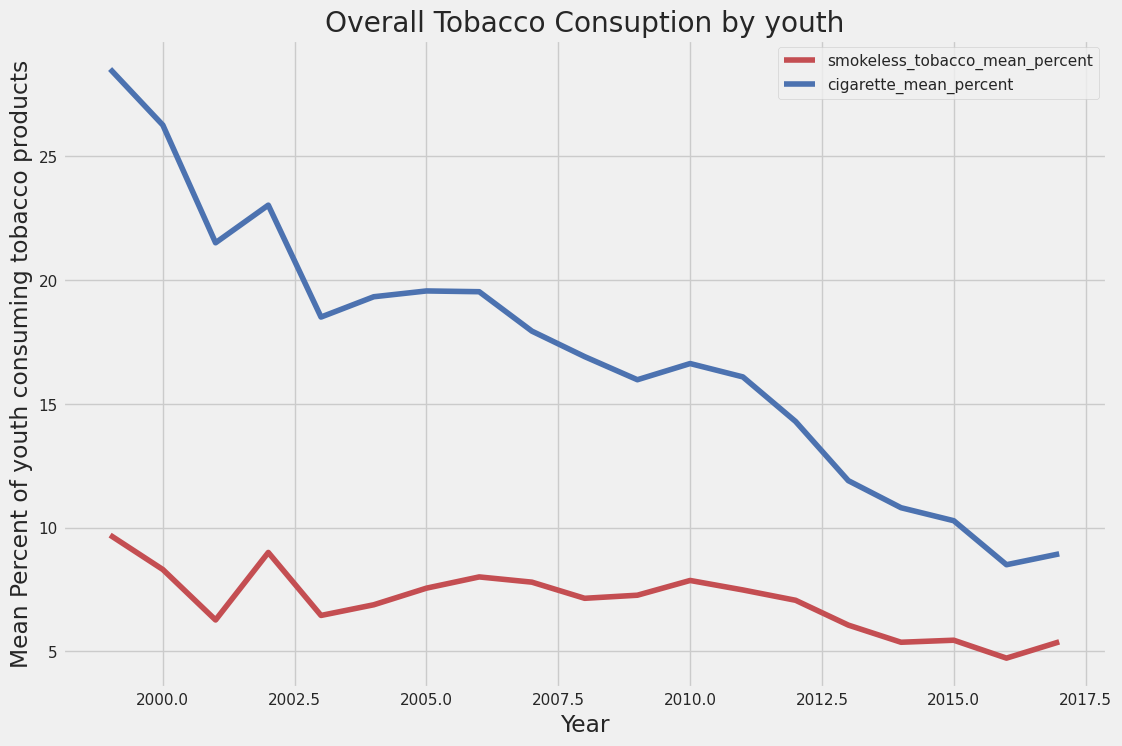

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df.index,df['Smokeless_mean'], color='r',linestyle='-',label='smokeless_tobacco_mean_percent') # setting the color, line style, labels
plt.plot(df.index,df['Cigarette_mean'], 'b-',label='cigarette_mean_percent') # a shortcut syntax to setting something very conventional - like a blue solid line

plt.legend() #put the window with the labels of the lines
plt.title('Overall Tobacco Consuption by youth')
plt.xlabel("Year") # AXIS and TITLE
plt.ylabel("Mean Percent of youth consuming tobacco products")
plt.show()

As the graph clearly illustrates, the percent of adolescents using cigarettes has sharply decreased from 1999 to 2017, however, the same cannot be said for the adolescents using smokeless tobacco. While there was some decrease, from 9.7% to 5.4%, the policies designed to reduce the use of tobacco do not seem to be as effective against smokeless tobacco.

Now let's create new datasets for high school only, and middle school only use of smokeless tobacco.

In [ ]:
data_youth.value_counts('Education')

Education
Middle School    4338
High School      3852
dtype: int64

In [ ]:
mask_midschool = youth_smokeless['Education'] == 'Middle School'
youth_smokeless_midschool = youth_smokeless[mask_midschool]
mask_highschool = youth_smokeless['Education'] == 'High School'
youth_smokeless_highschool = youth_smokeless[mask_highschool]

In [ ]:
print('The mean values for each year in the youth_smokeless_highschool data:\n')
youth_smokeless_highschool.groupby(by='YEAR')['Data_Value'].mean()

The mean values for each year in the youth_smokeless_highschool data:



YEAR
1999    13.524074
2000    10.661574
2001     8.036508
2002    11.362778
2003     8.958025
2004     9.395370
2005     9.955556
2006    10.293939
2007    10.368687
2008     9.893103
2009    10.495238
2010    10.827778
2011    10.283333
2012     8.505556
2013     8.927350
2014     7.639683
2015     7.998148
2016     7.316667
2017     7.450877
Name: Data_Value, dtype: float64

In [ ]:
print('The mean values for each year in the youth_smokeless_midschool data:\n')
youth_smokeless_midschool.groupby(by='YEAR')['Data_Value'].mean()

The mean values for each year in the youth_smokeless_midschool data:



YEAR
1999    7.610101
2000    6.217284
2001    5.149495
2002    6.941546
2003    4.578704
2004    4.735714
2005    5.158974
2006    5.727273
2007    5.229293
2008    4.872381
2009    4.452083
2010    4.906667
2011    4.432323
2012    5.342222
2013    3.740972
2014    3.106349
2015    2.912963
2016    3.181667
2017    3.150476
Name: Data_Value, dtype: float64

In [ ]:
df['Smokeless_mean_midschool'] = youth_smokeless_midschool.groupby(by='YEAR')['Data_Value'].mean()
df['Smokeless_mean_highschool'] = youth_smokeless_highschool.groupby(by='YEAR')['Data_Value'].mean()

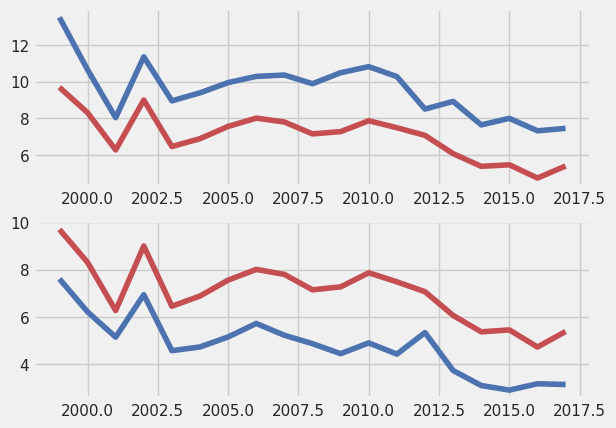

In [ ]:
plt.figure()
plt.subplot(2,1,1) # 2 rows and 1 column in the 1st instance
plt.plot(df.index,df['Smokeless_mean_highschool'],'b-',label='High School')
plt.plot(df.index,df['Smokeless_mean'], color='r',linestyle='-',label='smokeless_tobacco_mean_percent')

plt.subplot(2,1,2) # 2 rows and 1 column in the 2nd instance
plt.plot(df.index,df['Smokeless_mean_midschool'],'b-',label='High School')
plt.plot(df.index,df['Smokeless_mean'], color='r',linestyle='-',label='smokeless_tobacco_mean_percent')

plt.show()

The Trends for both Middle and High School mirror the trend for total use of smokeless tobacco. The plot illustrates that - the plot above represents the line for high school students, the plot below - middle school. On both plots the total (Middle and High school) smokeless tobacco use percentage is shown in red.

Let's now see if it is possible to identify the trends for each state separately. Let's take a look at how much data I have for each state:

In [ ]:
data_youth.groupby(['YEAR', 'LocationDesc']).mean(numeric_only=True)['Data_Value']

YEAR  LocationDesc  
1999  Arkansas          27.329167
      Georgia           14.011111
      Kansas            14.488889
      Mississippi       23.150000
      Missouri          14.444444
                          ...    
2017  North Dakota       7.652778
      Ohio               5.563889
      South Carolina     9.672222
      South Dakota       3.372222
      West Virginia     10.347222
Name: Data_Value, Length: 266, dtype: float64

In [ ]:
data_youth.groupby(['YEAR', 'LocationDesc'])['Data_Value'].mean().unstack().fillna(0)

LocationDesc,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,West Virginia,Wisconsin,Wyoming
YEAR,,,,,,,,,,,,,,,,,,,,,
1999,0.000000,0.000000,27.329167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.011111,...,12.555556,22.094444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000,21.197222,11.511111,22.461111,12.350000,15.722222,14.536111,16.672222,12.308333,0.000000,0.000000,...,26.344444,21.402778,17.458333,0.000000,11.094444,6.566667,0.000000,24.213889,18.525000,16.744444
2001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.677778,15.941667,...,12.855556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2002,20.011111,0.000000,0.000000,0.000000,0.000000,11.616667,14.980556,0.000000,27.738889,0.000000,...,0.000000,18.366667,0.000000,0.000000,9.311111,0.000000,0.000000,15.894444,15.938889,0.000000
2003,0.000000,12.747222,0.000000,8.505556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.252778,0.000000,0.000000,6.725000,0.000000,0.000000,0.000000,0.000000,7.944444,0.000000
2004,18.072222,0.000000,0.000000,0.000000,0.000000,0.000000,12.819444,0.000000,0.000000,0.000000,...,0.000000,10.594444,0.000000,0.000000,12.613889,5.766667,0.000000,0.000000,13.544444,0.000000
2005,0.000000,18.588889,18.083333,0.000000,0.000000,10.258333,0.000000,0.000000,0.000000,13.975000,...,8.366667,0.000000,0.000000,6.861111,0.000000,0.000000,0.000000,25.211111,0.000000,0.000000
2006,19.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.036111,0.000000
2007,0.000000,11.561111,15.561111,0.000000,0.000000,8.838889,0.000000,0.000000,0.000000,0.000000,...,7.438889,0.000000,0.000000,5.686111,0.000000,0.000000,5.511111,19.619444,0.000000,0.000000


Unfortunately, as can be seen from the table above, the state-by-state analysis seems impossible due to the lack of data. Most states are missing the data for more than half of the years I am considering in this analysis, and each year is missing more than half of the states. Hence, I will now move on to the analysis of the dataset for adults.

### **TRENDS IN TOBACCO CONSUMPTION AMONG ADULTS**

Let's take a look again at some general information about the data:

In [ ]:
print('The amount of data for each year in data_adults dataset:\n')
data_adults.value_counts('YEAR')

The amount of data for each year in data_adults dataset:



YEAR
2001-2002    2346
2010-2011    2346
2014-2015    2346
1992-1993    2338
1995-1996    2338
1998-1999    2313
2006-2007    2172
2003         1716
dtype: int64

In [ ]:
print('The amount of data for each state in data_adults dataset:\n')
data_adults.value_counts('LocationDesc')

The amount of data for each state in data_adults dataset:



LocationDesc
California              359
North Carolina          359
Texas                   357
Florida                 357
Michigan                357
New York                357
Illinois                357
Georgia                 357
Oklahoma                357
Washington              356
Virginia                356
Colorado                356
New Jersey              356
Nevada                  356
Ohio                    356
Pennsylvania            356
Arizona                 356
Minnesota               356
Missouri                356
Connecticut             355
Oregon                  355
Indiana                 355
Tennessee               355
Maryland                355
Massachusetts           355
Kansas                  354
Wisconsin               354
New Mexico              354
Mississippi             353
Louisiana               353
South Carolina          353
Arkansas                353
Alabama                 352
Kentucky                352
Iowa                    351
Utah   

Unlike in the Youth dataset, the data for adults is consistent for all the years that are present in the dataframe, and is approximately even for all states.

Let's take a look at the mean values for adult Tobacco consumption

In [ ]:
print('The mean values for each year in the data_adults dataset:\n')
data_adults.groupby(by='YEAR')['Data_Value'].mean()

The mean values for each year in the data_adults dataset:



YEAR
1992-1993    25.309034
1995-1996    24.908039
1998-1999    24.572220
2001-2002    23.828767
2003         19.655219
2006-2007    22.255847
2010-2011    20.521570
2014-2015    19.770024
Name: Data_Value, dtype: float64

Plotting a graph:

In [ ]:
ameans = data_adults.groupby(by='YEAR')['Data_Value'].mean()

ayears = data_adults['YEAR'].unique()
ayears.sort()
ayears

array(['1992-1993', '1995-1996', '1998-1999', '2001-2002', '2003',
       '2006-2007', '2010-2011', '2014-2015'], dtype=object)

In [ ]:
da = pd.DataFrame({'Total_mean':ameans}, index = ayears)

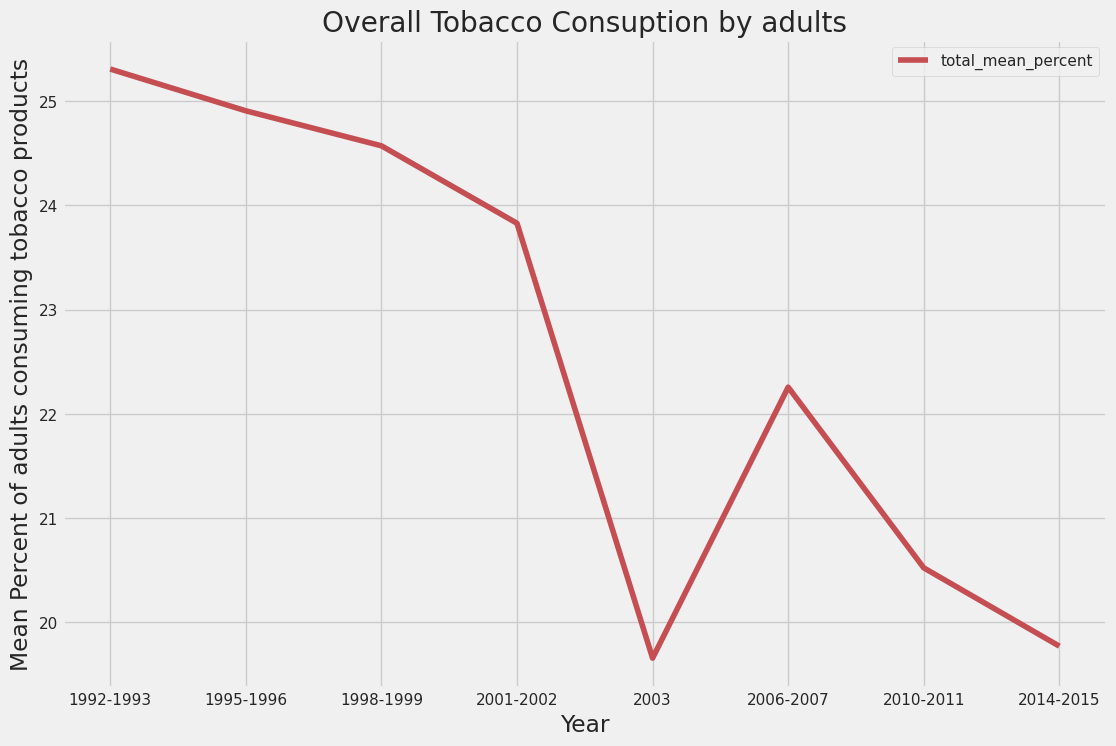

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(da.index,da['Total_mean'], color='r',linestyle='-',label='total_mean_percent') # setting the color, line style, labels
#plt.plot(df.index,df['cos'], 'r-',label='cos') # a shortcut syntax to setting something very conventional - like a blue solid line

plt.legend() #put the window with the labels of the lines
plt.title('Overall Tobacco Consuption by adults')
plt.xlabel("Year") # AXIS and TITLE
plt.ylabel("Mean Percent of adults consuming tobacco products")
plt.show()

As can be seen, tobacco consumption among adults has decreased in the past 20 years, however, very insignificantly compared to the sharp decrease among adolescents. Additionally, we can see that data for some years is missing entirely, and there is a sharp dip from almost 23% to 19.6% in 2003 which rises back up in 2006-2007. Let's also divide this data by the type of tobacco consumed:

In [ ]:
data_adults.head()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education
0,2003,RI,Rhode Island,Cigarette Use (Adults),21.1,1.8,17.6,24.6,693.0,Overall,All Races,Age 25 and Older,<12th Grade
1,1995-1996,UT,Utah,Cigarette Use (Adults),9.3,0.8,7.8,10.7,1830.0,Overall,All Races,Age 20 and Older,>12th Grade
8,2014-2015,WI,Wisconsin,Cigarette Use (Adults),25.1,3.2,18.9,31.3,273.0,Female,All Races,All Ages,All Grades
9,1995-1996,MD,Maryland,Cigarette Use (Adults),19.9,1.1,17.7,22.1,1442.0,Female,All Races,All Ages,All Grades
11,2014-2015,ME,Maine,Cigarette Use (Adults),12.9,1.9,9.1,16.7,506.0,Overall,All Races,All Ages,All Grades


In [ ]:
data_adults.value_counts('TopicDesc')

TopicDesc
Cigarette Use (Adults)            14292
Cigar Use (Adults)                 1223
Pipe Use (Adults)                  1200
Smokeless Tobacco Use (Adults)     1200
dtype: int64

In [ ]:
mask_smokeless = data_adults['TopicDesc'] == 'Smokeless Tobacco Use (Adults)'
adults_smokeless = data_adults[mask_smokeless]

mask_cigarette = data_adults['TopicDesc'] == 'Cigarette Use (Adults)'
adults_cigarette = data_adults[mask_cigarette]

mask_cigars = data_adults['TopicDesc'] == 'Cigar Use (Adults)'
adults_cigars = data_adults[mask_cigars]

mask_pipe = data_adults['TopicDesc'] == 'Pipe Use (Adults)'
adults_pipe = data_adults[mask_pipe]

In [ ]:
r,c = adults_smokeless.shape
print('There are {} rows and {} columns in my youth_smokeless dataset'.format(r,c))
r,c = adults_cigarette.shape
print('There are {} rows and {} columns in my youth_cigarette dataset'.format(r,c))
r,c = adults_cigars.shape
print('There are {} rows and {} columns in my youth_smokeless dataset'.format(r,c))
r,c = adults_pipe.shape
print('There are {} rows and {} columns in my youth_cigarette dataset'.format(r,c))

There are 1200 rows and 13 columns in my youth_smokeless dataset
There are 14292 rows and 13 columns in my youth_cigarette dataset
There are 1223 rows and 13 columns in my youth_smokeless dataset
There are 1200 rows and 13 columns in my youth_cigarette dataset


Now that the dataframes are created, I want to look at the mean values for each category across years.

In [ ]:
print('The mean values for smokeless tobacco consumption for each year in the data_adults dataset:\n')
adults_smokeless.groupby(by='YEAR')['Data_Value'].mean()

The mean values for smokeless tobacco consumption for each year in the data_adults dataset:



YEAR
1992-1993    2.857931
1995-1996    2.679310
1998-1999    2.795172
2001-2002    2.505882
2003         2.222876
2006-2007    2.417647
2010-2011    2.213072
2014-2015    2.139869
Name: Data_Value, dtype: float64

In [ ]:
print('The mean values for cigarette consumption for each year in the data_adults dataset:\n')
adults_cigarette.groupby(by='YEAR')['Data_Value'].mean()

The mean values for cigarette consumption for each year in the data_adults dataset:



YEAR
1992-1993    31.344818
1995-1996    30.846588
1998-1999    29.951922
2001-2002    29.404157
2003         26.225318
2006-2007    27.640514
2010-2011    25.892027
2014-2015    24.914542
Name: Data_Value, dtype: float64

In [ ]:
print('The mean values for cigar consumption for each year in the data_adults dataset:\n')
adults_cigars.groupby(by='YEAR')['Data_Value'].mean()

The mean values for cigar consumption for each year in the data_adults dataset:



YEAR
1992-1993    0.796078
1995-1996    0.916993
1998-1999    2.066447
2001-2002    2.633333
2003         2.328758
2006-2007    3.605229
2010-2011    2.213072
2014-2015    2.388889
Name: Data_Value, dtype: float64

The values for cigar consumption look interesting - the sharp increase from below 1% in 1996 to 2% in 1998. Maybe there is not enough data for earlier years:

In [ ]:
adults_cigars.value_counts('YEAR')

YEAR
1992-1993    153
1995-1996    153
2001-2002    153
2003         153
2006-2007    153
2010-2011    153
2014-2015    153
1998-1999    152
dtype: int64

There appears to a nearly even number of respondednts for each year, hence, there must have been an actual increase in cigar tobacco use.

In [ ]:
print('The mean values for pipe tobacco consumption for each year in the data_adults dataset:\n')
adults_pipe.groupby(by='YEAR')['Data_Value'].mean()

The mean values for pipe tobacco consumption for each year in the data_adults dataset:



YEAR
1992-1993    0.681699
1995-1996    0.566013
1998-1999    0.711628
2001-2002    0.608497
2003         0.479085
2006-2007    0.457516
2010-2011    0.345098
2014-2015    0.444444
Name: Data_Value, dtype: float64

Creating a graph:

In [ ]:
da['Smokeless adults'] = adults_smokeless.groupby(by='YEAR')['Data_Value'].mean()
da['Cigarette adults'] = adults_cigarette.groupby(by='YEAR')['Data_Value'].mean()
da['Cigar adults'] = adults_cigars.groupby(by='YEAR')['Data_Value'].mean()
da['Pipe adults'] = adults_pipe.groupby(by='YEAR')['Data_Value'].mean()

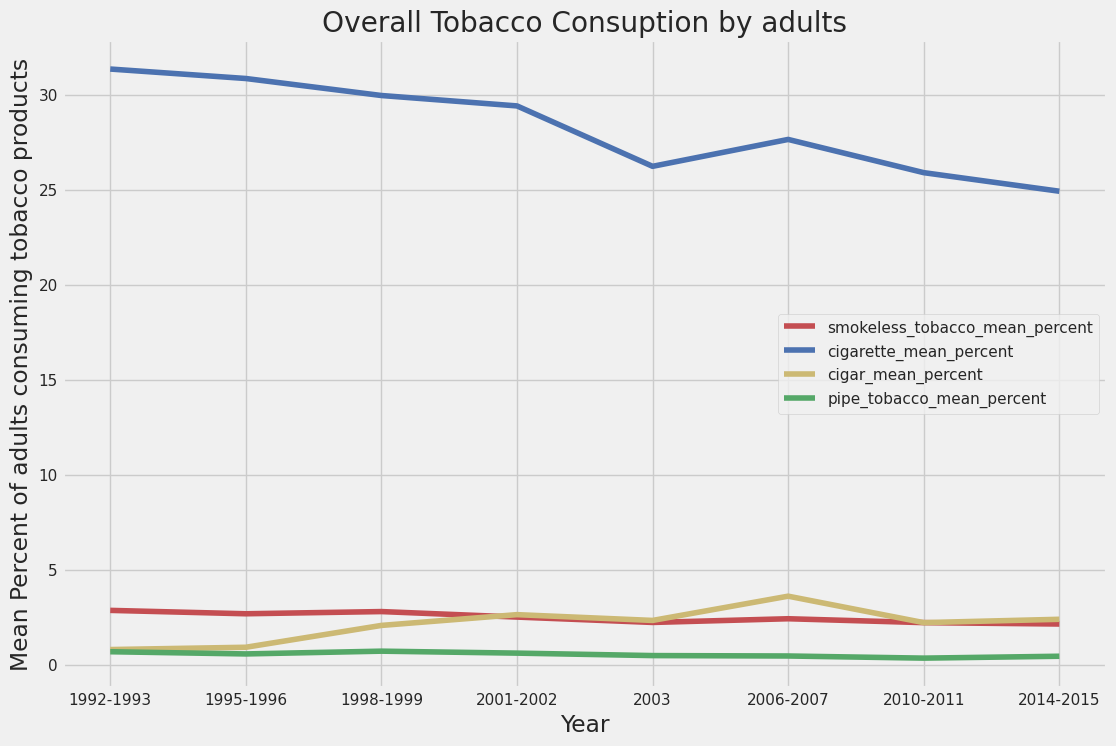

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(da.index,da['Smokeless adults'], color='r',linestyle='-',label='smokeless_tobacco_mean_percent') # setting the color, line style, labels
plt.plot(da.index,da['Cigarette adults'], 'b-',label='cigarette_mean_percent') # a shortcut syntax to setting something very conventional - like a blue solid line
plt.plot(da.index,da['Cigar adults'], 'y-',label='cigar_mean_percent')
plt.plot(da.index,da['Pipe adults'], 'g-',label='pipe_tobacco_mean_percent')

plt.legend() #put the window with the labels of the lines
plt.title('Overall Tobacco Consuption by adults')
plt.xlabel("Year") # AXIS and TITLE
plt.ylabel("Mean Percent of adults consuming tobacco products")
plt.show()

As the graph illustrates, there was a slight decrease in cigarette consumption over two decades,  from 31.3% to 24.9%. All other categories retained their small use percentage with almost no changes. The trends in total tobacco consuption for adults are dictated mainly by cigarette consumption.

Let's see if there is enough information for a state-by-state analysis:

In [ ]:
print('Mean percent of tobacco consumers for each state for each year:\n')
data_adults.groupby(['YEAR', 'LocationDesc']).mean(numeric_only=True)['Data_Value']

Mean percent of tobacco consumers for each state for each year:



YEAR       LocationDesc 
1992-1993  Alabama          25.753488
           Alaska           26.463043
           Arizona          24.322727
           Arkansas         27.069767
           California       22.613043
                              ...    
2014-2015  Virginia         20.251111
           Washington       20.163043
           West Virginia    24.709524
           Wisconsin        21.402222
           Wyoming          16.661538
Name: Data_Value, Length: 408, dtype: float64

In [ ]:
data_adults.groupby(['YEAR', 'LocationDesc'])['Data_Value'].mean().unstack().fillna(0)

LocationDesc,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
YEAR,,,,,,,,,,,,,,,,,,,,,
1992-1993,25.753488,26.463043,24.322727,27.069767,22.613043,25.760000,24.218182,24.809302,24.181818,24.471111,...,26.104651,27.095349,24.786957,22.327907,26.034884,25.151111,25.522727,27.990698,27.341860,25.495349
1995-1996,24.527907,26.543182,24.082609,26.123256,22.028261,24.726667,22.895455,25.141860,23.795455,23.666667,...,24.655814,26.311628,24.563043,21.818605,26.078571,25.060000,25.279545,26.720930,25.104545,25.953488
1998-1999,24.964286,27.058696,23.253333,26.469048,21.382609,23.738636,24.769048,25.218605,25.754762,23.230435,...,26.545238,25.983721,23.504348,20.595455,25.725000,23.938636,23.095556,27.276190,26.288095,25.644186
2001-2002,24.316279,25.691304,22.295652,25.327273,20.400000,23.204444,22.206667,23.113333,22.168182,22.224444,...,24.397727,26.159091,22.648889,19.675000,25.183333,23.788889,24.241304,26.004651,24.591111,25.279070
2003,20.608824,18.760000,18.822222,24.126471,16.248649,18.994444,18.030556,15.810345,10.962500,18.122222,...,16.055556,21.940000,19.061111,16.397059,16.080769,18.952778,20.633333,23.027273,21.042857,17.112000
2006-2007,24.011628,22.217647,21.389130,24.936364,19.236957,21.320000,21.064444,19.347368,16.703030,20.708889,...,20.652778,25.147727,21.431111,20.232558,20.485714,21.495556,22.175556,25.978571,23.524444,22.838235
2010-2011,22.122727,18.067857,19.919565,24.054545,18.197826,19.991111,19.857778,15.556250,8.370833,20.008889,...,17.866667,23.553333,20.573333,18.317500,13.423077,20.404444,21.368889,25.104762,21.820455,17.120000
2014-2015,22.447727,14.400000,18.706522,22.963636,17.369565,20.513333,19.686667,14.190323,8.896000,19.320000,...,17.550000,22.264444,20.034783,15.415789,9.866667,20.251111,20.163043,24.709524,21.402222,16.661538


There seems to be enough data for each of the 50 states and Washington DC.

Let's start with general trends. We'll take years 1992-1993, 2003, and 2014-2015 to see if the states that consume the most tobacco stay consistent over the entire time-period.

In [ ]:
data_adults['YEAR'].unique()

array(['2003', '1995-1996', '2014-2015', '2001-2002', '1998-1999',
       '2010-2011', '1992-1993', '2006-2007'], dtype=object)

In [ ]:
mask_1992 = data_adults['YEAR'] == '1992-1993'
adults_1992 = data_adults[mask_1992]

mask_2003 = data_adults['YEAR'] == '2003'
adults_2003 = data_adults[mask_2003]

mask_2015 = data_adults['YEAR'] == '2014-2015'
adults_2015 = data_adults[mask_2015]

In [ ]:
adults_1992.head()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education
45,1992-1993,OR,Oregon,Cigarette Use (Adults),23.1,1.7,19.9,26.4,881.0,Female,All Races,18 to 44 Years,All Grades
52,1992-1993,GA,Georgia,Cigarette Use (Adults),83.3,2.0,79.3,87.2,403.0,Male,All Races,All Ages,All Grades
56,1992-1993,AR,Arkansas,Cigar Use (Adults),0.1,0.1,0.0,0.3,2015.0,Female,All Races,All Ages,All Grades
61,1992-1993,ND,North Dakota,Cigarette Use (Adults),52.2,2.5,47.2,57.2,572.0,Overall,All Races,All Ages,All Grades
86,1992-1993,HI,Hawaii,Cigarette Use (Adults),20.5,1.5,17.6,23.5,793.0,Female,All Races,18 to 44 Years,All Grades


In [ ]:
print('The mean percentage of tobacco consumption for adults for each state in 1992:\n')
adults_1992.groupby(by='LocationAbbr')['Data_Value'].mean()

The mean percentage of tobacco consumption for adults for each state in 1992:



LocationAbbr
AK    26.463043
AL    25.753488
AR    27.069767
AZ    24.322727
CA    22.613043
CO    25.760000
CT    24.218182
DC    24.181818
DE    24.809302
FL    24.471111
GA    25.109302
HI    23.825581
IA    24.279070
ID    24.723256
IL    24.600000
IN    26.548837
KS    25.625000
KY    28.609302
LA    25.579070
MA    23.861364
MD    24.243182
ME    27.351220
MI    26.406522
MN    25.522727
MO    25.918605
MS    25.679070
MT    25.437209
NC    26.408696
ND    24.809302
NE    24.560465
NH    25.948780
NJ    22.875556
NM    24.817778
NV    26.724444
NY    23.413333
OH    25.491111
OK    26.373333
OR    24.438636
PA    24.431111
RI    24.481818
SC    25.623256
SD    26.104651
TN    27.095349
TX    24.786957
UT    22.327907
VA    25.151111
VT    26.034884
WA    25.522727
WI    27.341860
WV    27.990698
WY    25.495349
Name: Data_Value, dtype: float64

In [ ]:
state_means1992 = adults_1992.groupby(by='LocationAbbr')['Data_Value'].mean()

In [ ]:
states = adults_1992['LocationAbbr'].unique()
states = np.sort(states)
states

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [ ]:
df1 = pd.DataFrame({'1992_means':state_means1992}, index = states)

In [ ]:
df1.head()

,1992_means
AK,26.463043
AL,25.753488
AR,27.069767
AZ,24.322727
CA,22.613043


The mean values seem to be more-less consistent across al states for 1992-1993 with neither beeing a clear leader.

In [ ]:
print('The mean percentage of tobacco consumption for adults for each state in 2003:\n')
adults_2003.groupby(by='LocationDesc')['Data_Value'].mean()

The mean percentage of tobacco consumption for adults for each state in 2003:



LocationDesc
Alabama                 20.608824
Alaska                  18.760000
Arizona                 18.822222
Arkansas                24.126471
California              16.248649
Colorado                18.994444
Connecticut             18.030556
Delaware                15.810345
District of Columbia    10.962500
Florida                 18.122222
Georgia                 19.122222
Hawaii                  16.118750
Idaho                   21.336364
Illinois                19.730556
Indiana                 22.417143
Iowa                    20.232353
Kansas                  21.960000
Kentucky                24.950000
Louisiana               21.440000
Maine                   21.690909
Maryland                17.619444
Massachusetts           17.683333
Michigan                21.594444
Minnesota               19.963889
Mississippi             20.808824
Missouri                23.097143
Montana                 19.624138
Nebraska                21.600000
Nevada                  18.794444
N

In [ ]:
df1['2003_means'] = adults_2003.groupby(by='LocationAbbr')['Data_Value'].mean()

In [ ]:
df1.head()

,1992_means,2003_means
AK,26.463043,18.760000
AL,25.753488,20.608824
AR,27.069767,24.126471
AZ,24.322727,18.822222
CA,22.613043,16.248649


In [ ]:
print('The mean percentage of tobacco consumption for adults for each state in 2015:\n')
adults_2015.groupby(by='LocationDesc')['Data_Value'].mean()

The mean percentage of tobacco consumption for adults for each state in 2015:



LocationDesc
Alabama                 22.447727
Alaska                  14.400000
Arizona                 18.706522
Arkansas                22.963636
California              17.369565
Colorado                20.513333
Connecticut             19.686667
Delaware                14.190323
District of Columbia     8.896000
Florida                 19.320000
Georgia                 19.751111
Hawaii                  12.403125
Idaho                   16.502857
Illinois                19.802222
Indiana                 22.795556
Iowa                    21.900000
Kansas                  22.437778
Kentucky                24.004545
Louisiana               22.473333
Maine                   20.948649
Maryland                18.682222
Massachusetts           19.195556
Michigan                21.817778
Minnesota               20.742222
Mississippi             22.972093
Missouri                22.171111
Montana                 16.206667
Nebraska                20.395000
Nevada                  20.413333
N

In [ ]:
df1['2015_means'] = adults_2015.groupby(by='LocationAbbr')['Data_Value'].mean()

In [ ]:
df1.head()

,1992_means,2003_means,2015_means
AK,26.463043,18.760000,14.400000
AL,25.753488,20.608824,22.447727
AR,27.069767,24.126471,22.963636
AZ,24.322727,18.822222,18.706522
CA,22.613043,16.248649,17.369565


In [ ]:
# Removing DC
df1 = df1.drop('DC', axis = 'index')

Displaying all figures together:

In [ ]:
fig = px.choropleth(locations=df1.index, locationmode="USA-states", color=df1['1992_means'], scope="usa",color_continuous_scale='Reds')
fig.update_layout(title='US Tobacco Consumption Across States in 1992',title_x=0.5)
fig.show()

In [ ]:
fig = px.choropleth(locations=df1.index, locationmode="USA-states", color=df1['2003_means'], scope="usa",color_continuous_scale='Reds')
fig.update_layout(title='US Tobacco Consumption Across States in 2003',title_x=0.5)
fig.show()

In [ ]:
fig = px.choropleth(locations=df1.index, locationmode="USA-states", color=df1['2015_means'], scope="usa",color_continuous_scale='Reds')
fig.update_layout(title='US Tobacco Consumption Across States in 2015',title_x=0.5)
fig.show()

The figures seem to stay more-less consistent among most states, with an insignificant decline consistent with the overall declining trend for tobacco consumption.

Kettucky remains among the states with the highest percentages of adults consuming tobacco, while California - the lowest. There is a sharp decline in tobacco consuption in Vermont since 1992, and a sharp increase in Alaska. Nevada had an increase in tobacco consuption after 1992 followed by a slight rise from 2003 to 2015.

The central part, closer to the East coast of the US has the highest concentration of states with high tobacco consumption.

### **OVERALL TRENDS IN TOBACCO CONSUMPTION IN THE US BY IMPORTS AND DOMESTIC PRODUCTION**

In [ ]:
data_cons.head()

,Year,Population,Topic,Measure,Submeasure,Data Value Unit,Domestic,Imports,Total,Domestic Per Capita,Imports Per Capita,Total Per Capita
0,2000,209786736,Noncombustible Tobacco,Smokeless Tobacco,Chewing Tobacco,Pounds,45502156,91965,45594121,0.217,0.0,0.217
1,2000,209786736,Combustible Tobacco,Cigarettes,Cigarette Removals,Cigarettes,423250355675,12319663000,435570018675,2018.000,59.0,2076.000
2,2000,209786736,Combustible Tobacco,Cigars,Total Cigars,Cigars,5612867329,548243000,6161110329,27.000,3.0,29.000
3,2000,209786736,Combustible Tobacco,Loose Tobacco,Total Loose Tobacco,Cigarette Equivalents,8291276800,702741662,8994018462,40.000,3.0,43.000
4,2000,209786736,Combustible Tobacco,Loose Tobacco,Total Loose Tobacco,Pounds,16841656,1427444,18269100,0.000,0.0,0.000


In [ ]:
print('The total mean values for each year in the data_cons dataset:\n')
data_cons.groupby(by='Year')['Total Per Capita'].mean()

The total mean values for each year in the data_cons dataset:



Year
2000    336.117846
2001    324.427846
2002    314.119385
2003    300.350462
2004    296.350154
2005    285.118308
2006    282.043077
2007    267.657231
2008    256.889000
2009    234.580000
2010    224.810923
2011    222.272308
2012    217.734769
2013    207.966000
2014    198.196615
2015    198.735154
2016    189.812077
2017    181.888154
2018    173.467000
2019    164.520615
2020    163.195538
2021    153.549538
2022    138.504846
Name: Total Per Capita, dtype: float64

Let's graph it:

In [ ]:
cons = data_cons.groupby(by='Year')['Total Per Capita'].mean()

cyears = data_cons['Year'].unique()
cyears.sort()
cyears

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [ ]:
dc = pd.DataFrame({'Total_Per_Capita':cons}, index = cyears)

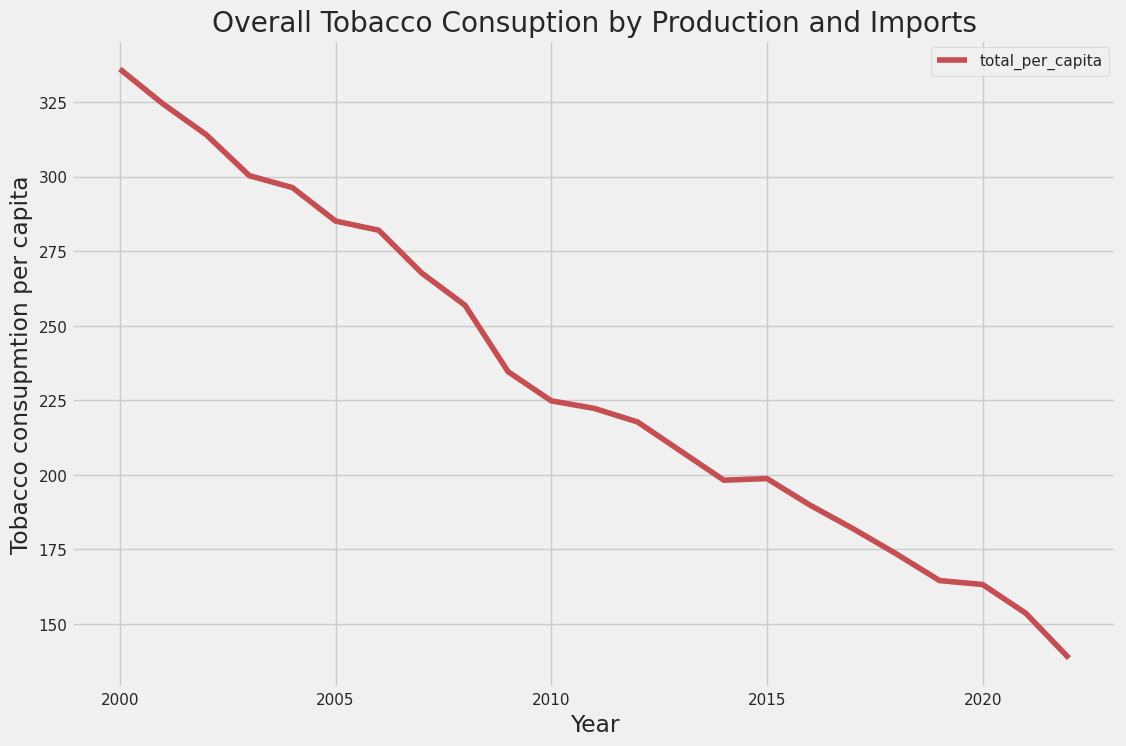

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(dc.index,dc['Total_Per_Capita'], color='r',linestyle='-',label='total_per_capita') # setting the color, line style, labels
#plt.plot(df.index,df['cos'], 'r-',label='cos') # a shortcut syntax to setting something very conventional - like a blue solid line

plt.legend() #put the window with the labels of the lines
plt.title('Overall Tobacco Consuption by Production and Imports')
plt.xlabel("Year") # AXIS and TITLE
plt.ylabel("Tobacco consupmtion per capita")
plt.show()

The trends for overall tobacco consumption in the US by imports has experienced an overall decline from 2000 to 2022, consistent with the previous results for adult and adolescent usage displayed by the surveys.

Now let's look at the trends for combustible and non-combustible tobacco.

In [ ]:
data_cons.value_counts('Topic')

Topic
Combustible Tobacco       253
Noncombustible Tobacco     46
dtype: int64

In [ ]:
mask_combust = data_cons['Topic'] == 'Combustible Tobacco'
cons_combust = data_cons[mask_combust]

mask_noncombust = data_cons['Topic'] == 'Noncombustible Tobacco'
cons_noncombust = data_cons[mask_noncombust]

In [ ]:
print('The mean values for each year in the data_cons dataset for combustible tobacco:\n')
cons_combust.groupby(by='Year')['Total Per Capita'].mean()

The mean values for each year in the data_cons dataset for combustible tobacco:



Year
2000    397.181818
2001    383.363636
2002    371.181818
2003    354.909091
2004    350.181818
2005    336.909091
2006    333.272727
2007    316.272727
2008    303.545455
2009    277.181818
2010    265.636364
2011    262.636364
2012    257.272727
2013    245.727273
2014    234.181818
2015    234.818182
2016    224.272727
2017    214.909091
2018    205.000000
2019    194.387000
2020    192.820000
2021    181.423000
2022    163.645727
Name: Total Per Capita, dtype: float64

The trends for the imports and production of Combustible tobacco have experineced a significant decline - as expected - from 397 pounds in 2000 to 163 pounds in 2022.

In [ ]:
dc['Combustible'] = cons_combust.groupby(by='Year')['Total Per Capita'].mean()
dc['Non-Combustible'] = cons_noncombust.groupby(by='Year')['Total Per Capita'].mean()

In [ ]:
print('The mean values for each year in the data_cons dataset for non-combustible tobacco:\n')
cons_noncombust.groupby(by='Year')['Total Per Capita'].mean()

The mean values for each year in the data_cons dataset for non-combustible tobacco:



Year
2000    0.2660
2001    0.2810
2002    0.2760
2003    0.2780
2004    0.2760
2005    0.2690
2006    0.2800
2007    0.2720
2008    0.2785
2009    0.2700
2010    0.2710
2011    0.2700
2012    0.2760
2013    0.2790
2014    0.2780
2015    0.2785
2016    0.2785
2017    0.2730
2018    0.0355
2019    0.2555
2020    0.2610
2021    0.2455
2022    0.2300
Name: Total Per Capita, dtype: float64

The imports and production of non-combustible(smokeless) tobacco have a experienced an almost insignificant decline from 2000 to 2022, overall remaining consistent and relatively low. Graphing:

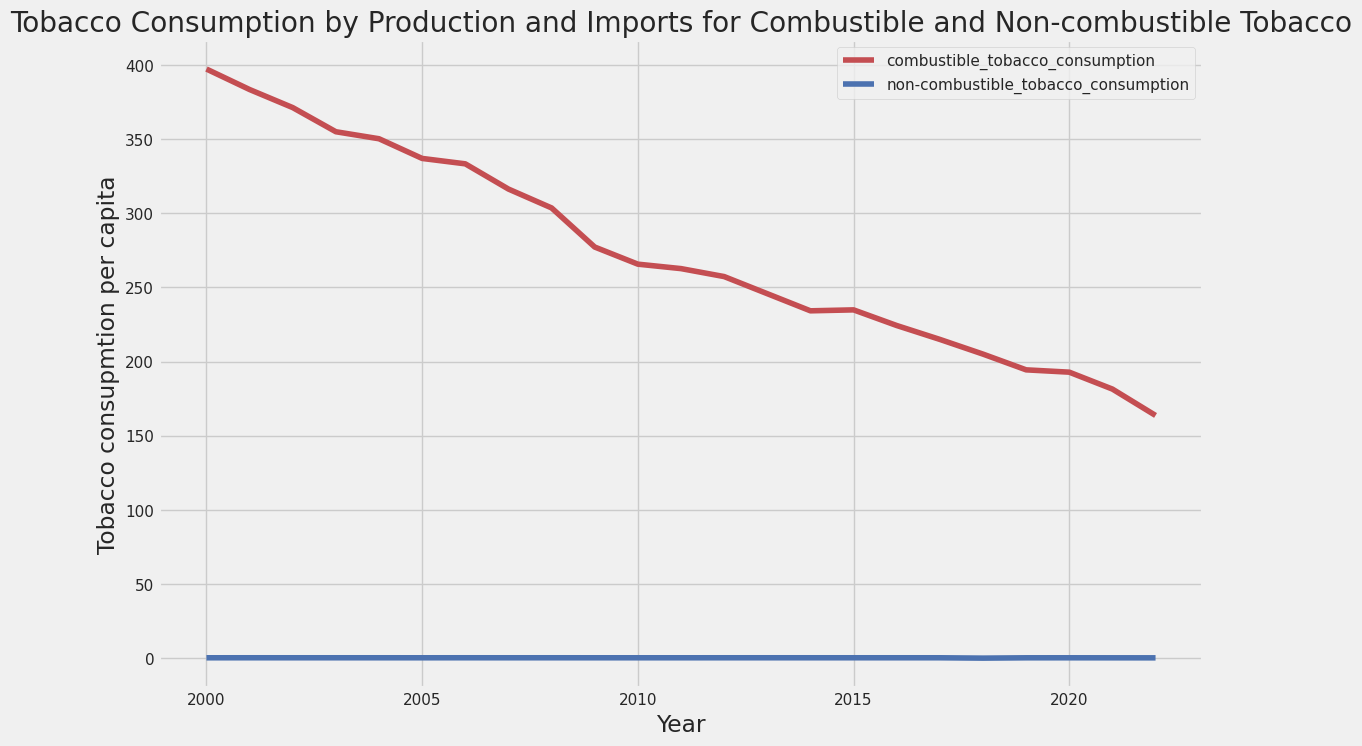

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(dc.index,dc['Combustible'], color='r',linestyle='-',label='combustible_tobacco_consumption') # setting the color, line style, labels
plt.plot(dc.index,dc['Non-Combustible'], 'b-',label='non-combustible_tobacco_consumption') # a shortcut syntax to setting something very conventional - like a blue solid line

plt.legend() #put the window with the labels of the lines
plt.title('Tobacco Consumption by Production and Imports for Combustible and Non-combustible Tobacco')
plt.xlabel("Year") # AXIS and TITLE
plt.ylabel("Tobacco consupmtion per capita")
plt.show()

### **SUMMARY**

Overall, in the US since the end of 20th century and in the first two decades of 21st century the consumption of tobacco products has experienced an overall steady decline.This was shown in tobacco consumption trends for both adults and youth, as well as throguh the declined imports and production of tobacco in the US.

However, the results differed for different age groups and different types of tobacco.

The sharpest decline was observed among youth in cigarette category. For them, the percentage of smokers decreased nearly by three times. The smoking adult population also experienced a slight decline in percentage of smokers, which however, is not as significant as that among adolescents, which is to be expected.

This indicates high effectiveness of smoking-free policies imposed by the US government over the last century for cigarette use.

However, the policies prove to be not as effective when it come to the consumption of non-combustible or smokeless tobacco. The percentage of the population using this type of tobacco has remained largely unchnged, and the number of young people starting to use it also did not experience any significant changes. This is also supported by the unchanges amounts of imported and produced non-combustible tobacco.

The trends in tobacco consumption seem to have not been affected by the emergence of e-cigarettes in 2015. However, I cannot say that these datasets (all I could find on the web) are sufficient enoguh to make any conclusions regarding e-cigarettes. Largerly because e-cigarettes were not included into the surveys, as well as because a lot of data was misiing in the adults and youth datasets, especially for the last 5 years.

This analysis also carries some limitations related to the availability of the data described above. However, overall trends seem to match across three datasets which aloows me to say that the trends identified by me should adhere to the truth with some certainty.

